# Chicken Disease Detection Inference

This notebook demonstrates how to perform inference using the trained CNN model for detecting chicken diseases from fecal images.

## Model Details
- **Model File**: `cnn_model.h5` (Keras HDF5 format)
- **Pickle File**: `model_cnn.pkl` (Pickled model)
- **Input Size**: 150x150 pixels
- **Classes**: Coccidiosis, Healthy, New Castle Disease, Salmonella
- **Preprocessing**: Rescale to 1./255, resize to (150, 150)

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from PIL import Image

## Load Models

Load both the HDF5 model and the pickled model for comparison.

In [ ]:
# Load HDF5 model
model_h5 = load_model('model/cnn_model.h5')
print("HDF5 model loaded successfully")

# Load pickled model
with open('model_cnn.pkl', 'rb') as file:
    model_pkl = pickle.load(file)
print("Pickled model loaded successfully")

# Class names (based on the training generator)
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

HDF5 model loaded successfully
Pickled model loaded successfully


c:\Users\USER\miniconda3\envs\h8_env\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Preprocessing Function

Define a function to preprocess images before inference.

In [4]:
def preprocess_image(img_path, target_size=(150, 150)):
    """
    Preprocess an image for model inference.
    
    Args:
        img_path (str): Path to the image file
        target_size (tuple): Target size for resizing (height, width)
    
    Returns:
        np.array: Preprocessed image array
    """
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert to array
    img_array = image.img_to_array(img)
    
    # Rescale
    img_array = img_array / 255.0
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

## Inference Function

Define a function to perform inference and display results.

In [5]:
def predict_disease(img_path, model, class_names):
    """
    Predict the disease from an image using the given model.
    
    Args:
        img_path (str): Path to the image file
        model: Trained model
        class_names (list): List of class names
    
    Returns:
        tuple: (predicted_class, confidence, probabilities)
    """
    # Preprocess image
    processed_img = preprocess_image(img_path)
    
    # Make prediction
    predictions = model.predict(processed_img)
    
    # Get predicted class index
    predicted_class_idx = np.argmax(predictions[0])
    
    # Get predicted class name
    predicted_class = class_names[predicted_class_idx]
    
    # Get confidence
    confidence = predictions[0][predicted_class_idx]
    
    return predicted_class, confidence, predictions[0]

## Test Inference

Test the inference on some sample images from the test dataset.

In [6]:
# Get some test images
test_dir = 'chicken_disease/test'
test_images = []

# Collect a few images from each class
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    if os.path.exists(class_dir):
        images = os.listdir(class_dir)[:2]  # Take 2 images per class
        for img in images:
            test_images.append((os.path.join(class_dir, img), class_name))

# Perform inference on test images
results_h5 = []
results_pkl = []

for img_path, true_class in test_images:
    # Predict with HDF5 model
    pred_h5, conf_h5, probs_h5 = predict_disease(img_path, model_h5, class_names)
    results_h5.append((img_path, true_class, pred_h5, conf_h5))
    
    # Predict with pickled model
    pred_pkl, conf_pkl, probs_pkl = predict_disease(img_path, model_pkl, class_names)
    results_pkl.append((img_path, true_class, pred_pkl, conf_pkl))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


## Display Results

Display the inference results with images.

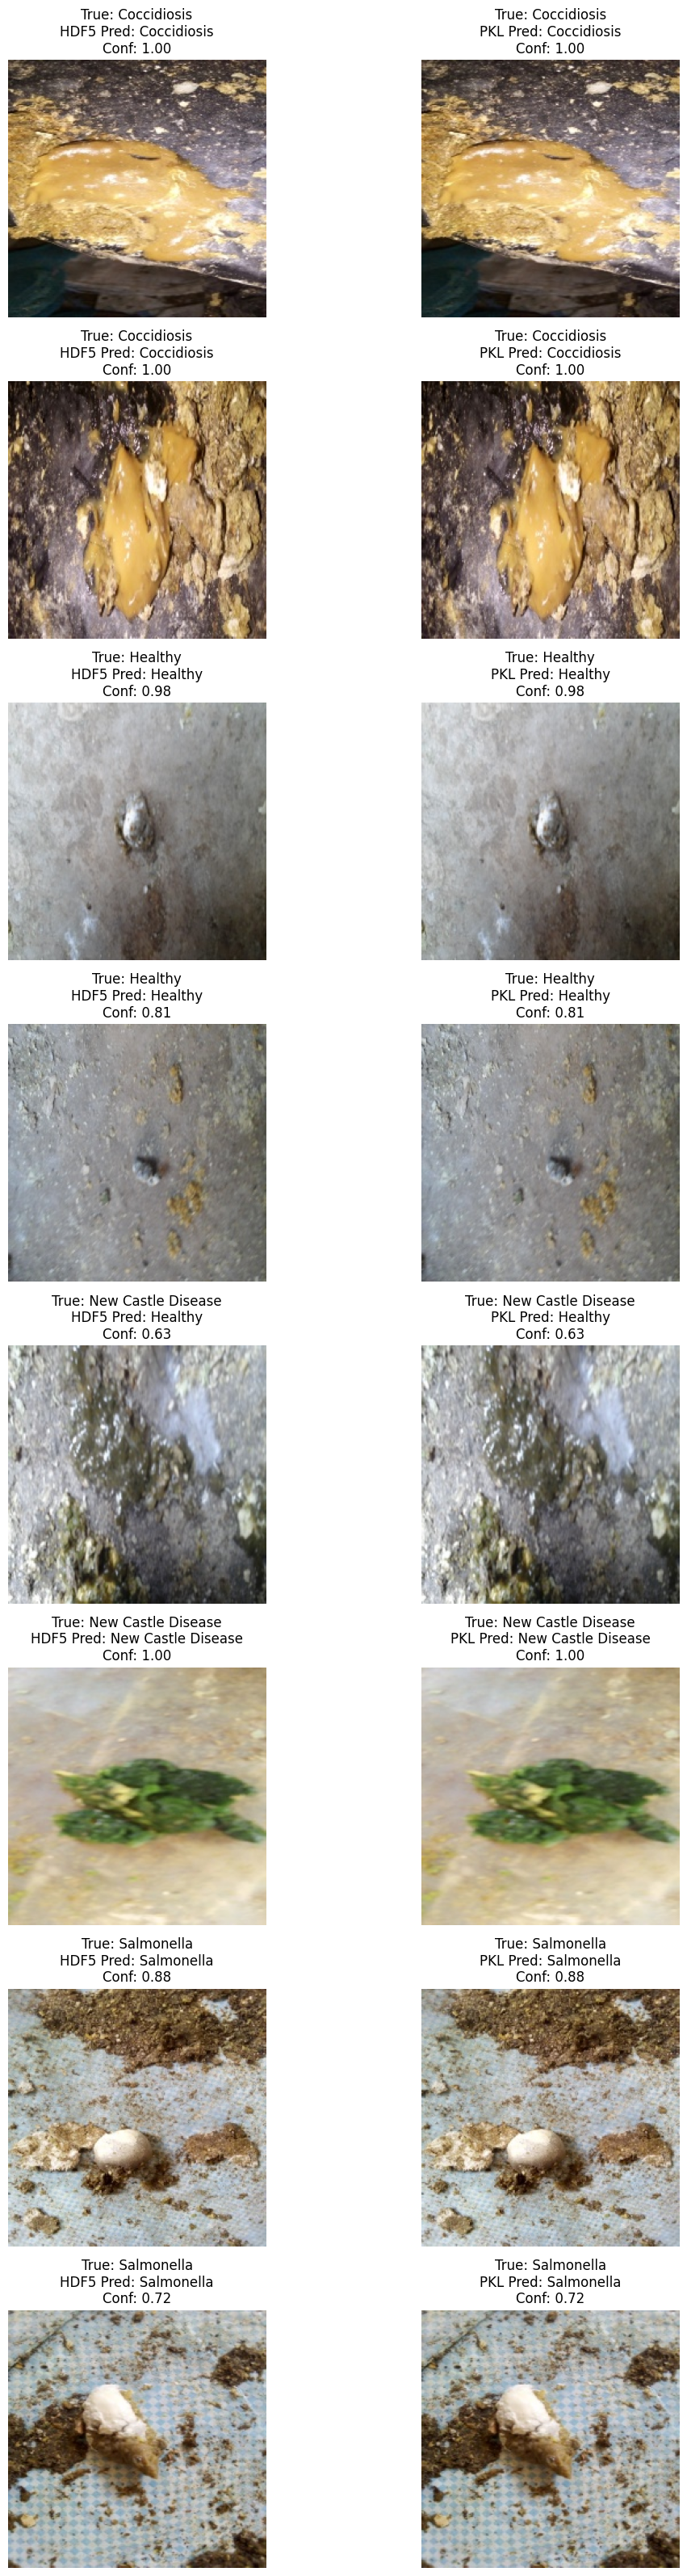

In [7]:
# Display results
fig, axes = plt.subplots(len(test_images), 2, figsize=(12, 4*len(test_images)))

for i, ((img_path, true_class, pred_h5, conf_h5), (_, _, pred_pkl, conf_pkl)) in enumerate(zip(results_h5, results_pkl)):
    # Load and display image
    img = Image.open(img_path)
    
    # HDF5 model results
    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f'True: {true_class}\nHDF5 Pred: {pred_h5}\nConf: {conf_h5:.2f}')
    axes[i, 0].axis('off')
    
    # Pickled model results
    axes[i, 1].imshow(img)
    axes[i, 1].set_title(f'True: {true_class}\nPKL Pred: {pred_pkl}\nConf: {conf_pkl:.2f}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

## Summary

This notebook demonstrates how to:
1. Load trained CNN models from HDF5 and pickle formats
2. Preprocess images for inference
3. Perform predictions on chicken fecal images
4. Display results with confidence scores

The model can classify images into four categories: Coccidiosis, Healthy, New Castle Disease, and Salmonella.